In [2]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import sklearn.model_selection as sk
from sklearn.utils import shuffle
import random
import pickle

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X = np.vstack([x_train,x_test])

In [5]:
y = np.append(y_train,y_test)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [6]:
training_images_lab = {0:"top", 1:"trouser", 2:"pullover", 4:"coat", 5:"sandal", 9:"ankle boot"}
unseen_image_lab = {3:"dress", 7:"sneaker", 8:"bag", 6:"shirt"}

In [7]:
X_train = []
y_train = []
X_test = []
y_test = []
for index in range(len(y)):    
    if y[index] in training_images_lab.keys():
        X_train.append(X[index])
        y_train.append(y[index])
    else:
        X_test.append(X[index])
        y_test.append(y[index])

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test2 = np.array(X_test)
y_test2 = np.array(y_test)

In [9]:
y_test2[:20]

array([3, 7, 7, 6, 3, 8, 3, 3, 6, 6, 8, 6, 6, 7, 7, 3, 3, 3, 3, 7],
      dtype=uint8)

In [10]:
X_train, X_test1, y_train, y_test1 = sk.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
X_test3, y_test3 = np.concatenate([X_test1, X_test2]), np.concatenate([y_test1, y_test2])

In [12]:
X_train.shape

(33600, 28, 28)

In [13]:
X_test1.shape

(8400, 28, 28)

In [14]:
X_test2.shape

(28000, 28, 28)

In [15]:
X_test3.shape

(36400, 28, 28)

### finish requirements
Keep 80% of the images with labels ["top", "trouser", "pullover", "coat", "sandal", "ankle
boot"] for training and 20% for testing1. </p>

* X_train.shape = (33600, 28, 28) </p>

* X_test1 shape = (8400, 28, 28) </p>

Keep 100% of the images with labels in ["dress", "sneaker", "bag", "shirt"] for testing2</p>

* X_test2 shape = (36400, 28, 28)




### Sort by category

In [16]:
training_images_lab.keys()

dict_keys([0, 1, 2, 4, 5, 9])

In [17]:
digit_indices = [np.where(y_train == i)[0] for i in training_images_lab.keys()]

In [18]:
digit_indices

[array([    1,     5,    34, ..., 33542, 33568, 33599], dtype=int64),
 array([    4,     7,    27, ..., 33584, 33587, 33589], dtype=int64),
 array([    3,     9,    11, ..., 33586, 33590, 33597], dtype=int64),
 array([    0,     6,    12, ..., 33588, 33592, 33595], dtype=int64),
 array([    2,    10,    13, ..., 33593, 33594, 33598], dtype=int64),
 array([    8,    19,    28, ..., 33578, 33591, 33596], dtype=int64)]

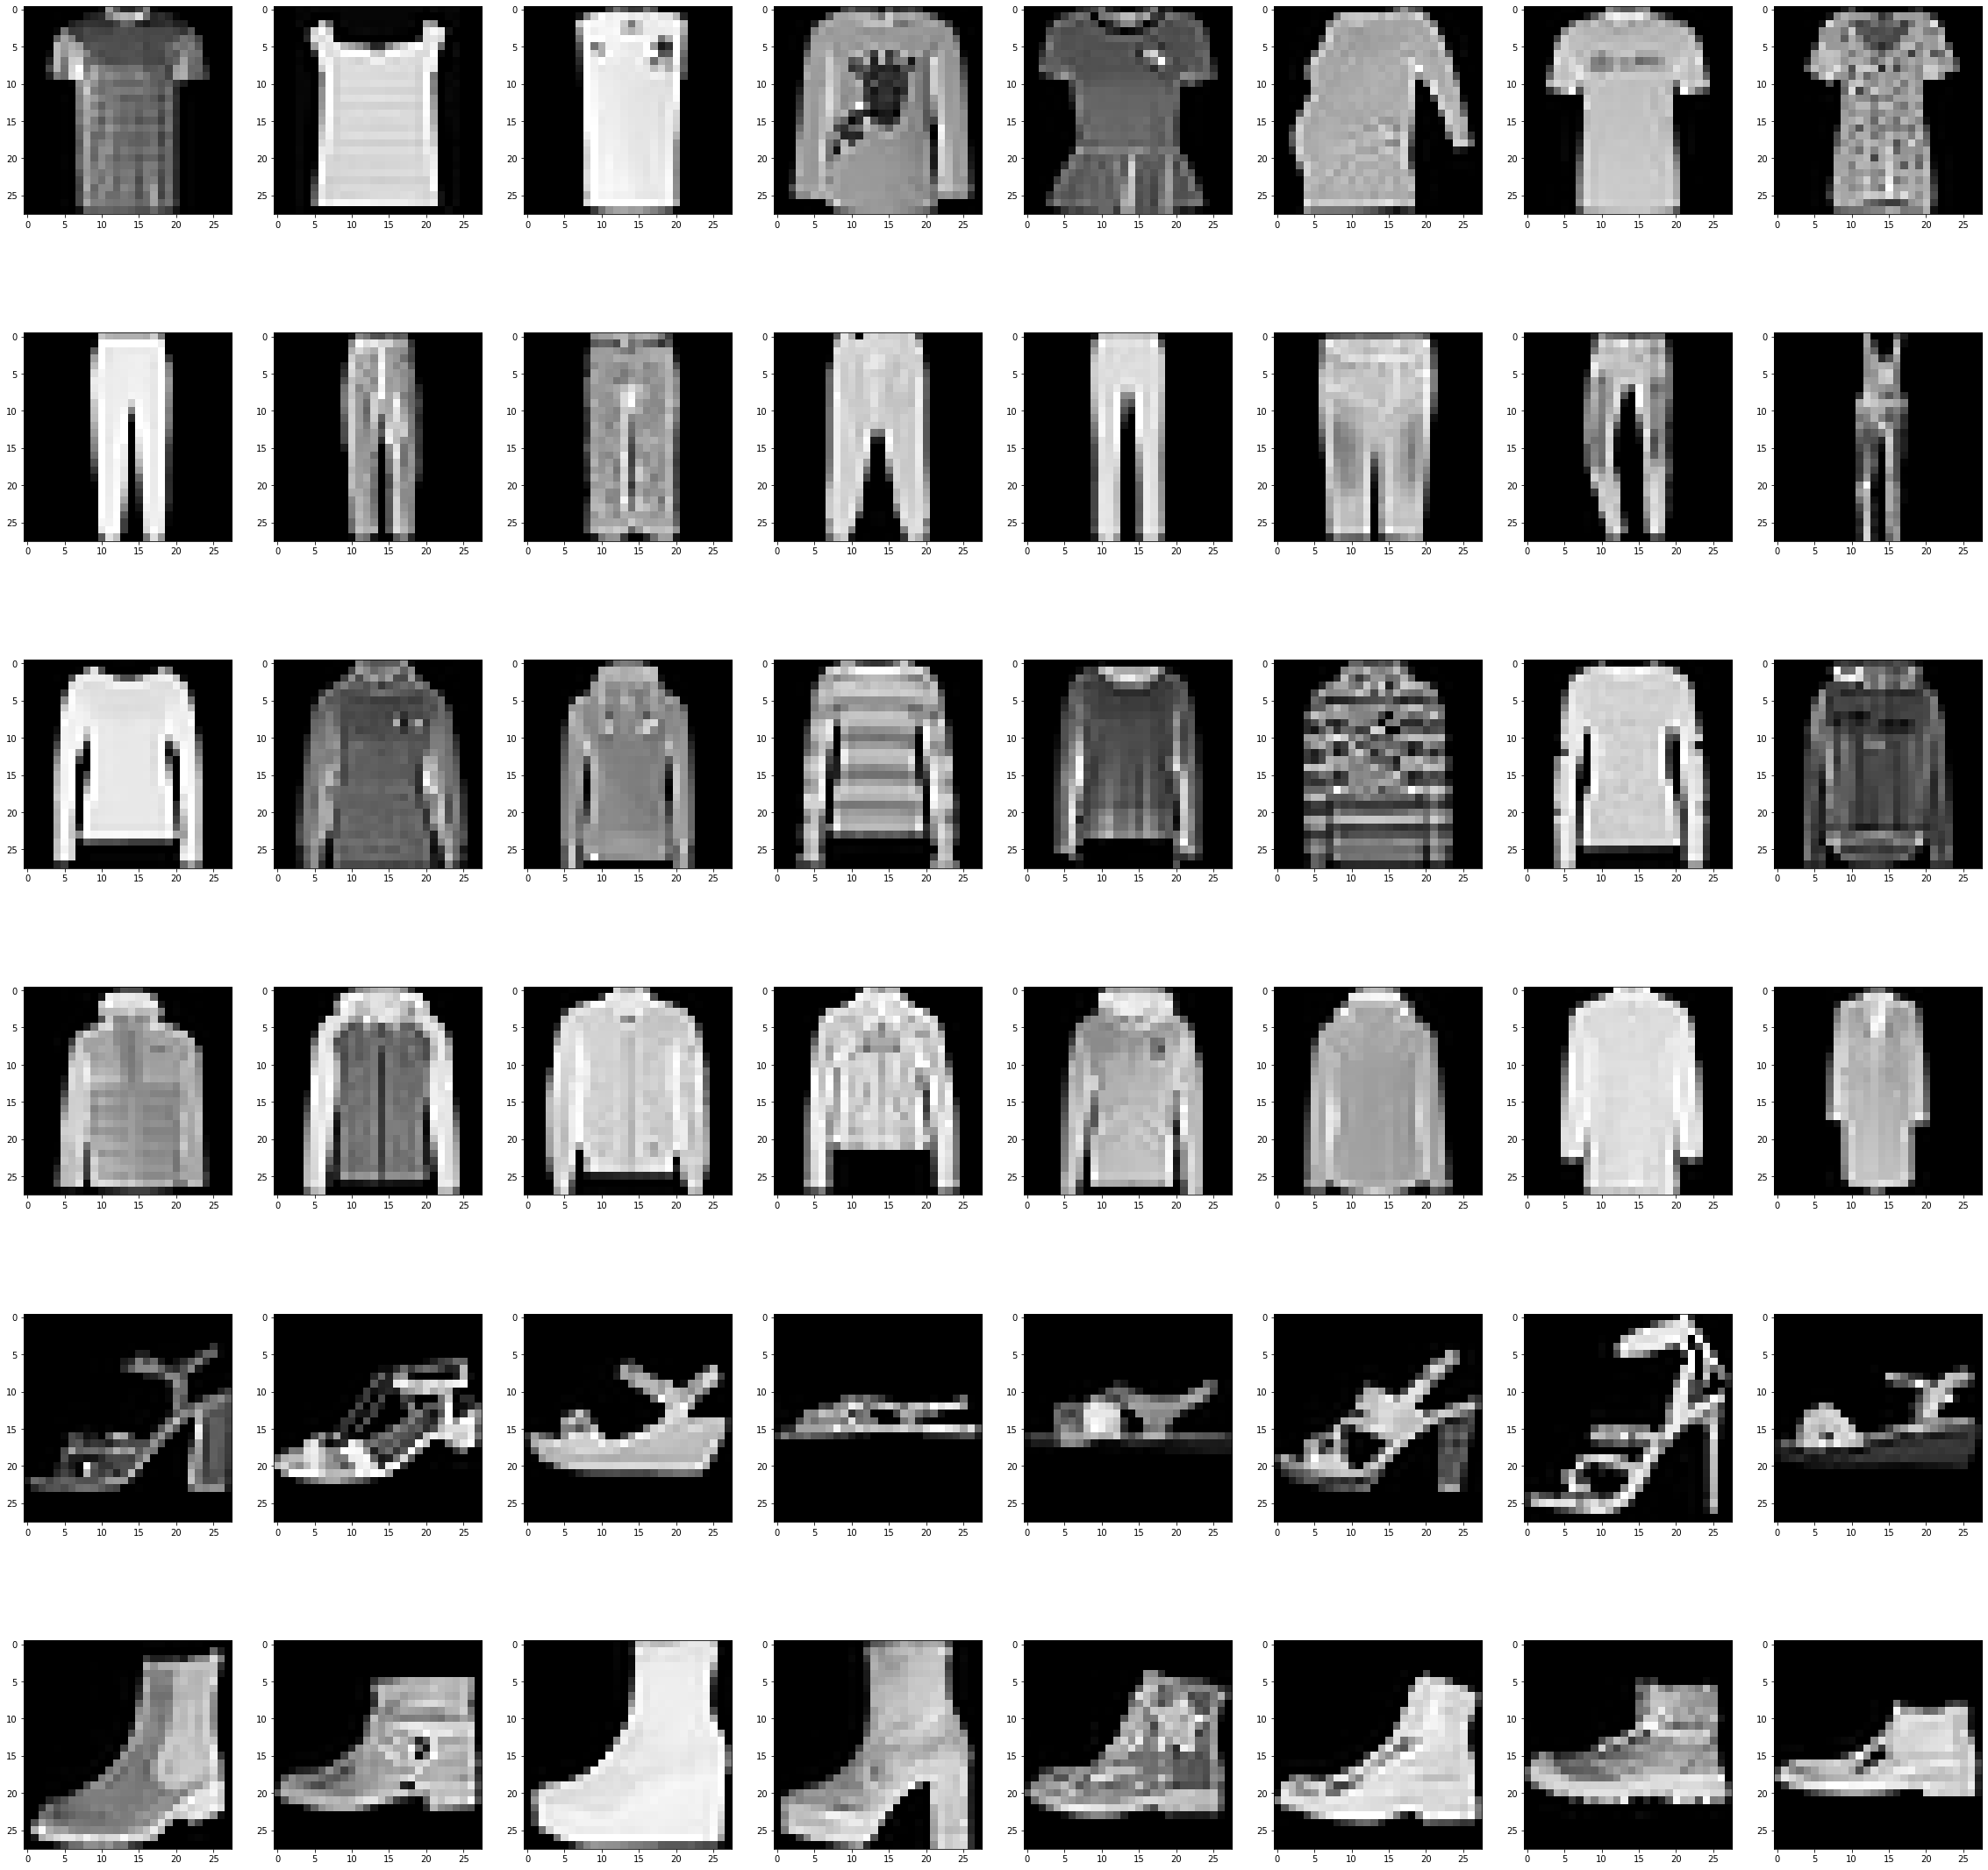

In [19]:
fig, ax = plt.subplots(nrows=6, ncols=8,figsize=(40, 40))
for row in range(6):
    for col in range(8):
        ax[row,col].imshow(X_train[digit_indices[row][col]],cmap = 'gray')
plt.show()

In [20]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(len(digit_indices))]) - 1
    for d in range(len(digit_indices)):
        for i in range(n):
            # Postive Pairs - y = 0
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            # Negative Pairs - y = 1
#             inc = d
#             while inc == d:
#                 inc = random.randint(0,len(digit_indices)-1)
            inc = random.randrange(1, len(digit_indices))
            dn = (d + inc) % len(digit_indices)
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

In [21]:
digit_indices = [np.where(y_train == i)[0] for i in list(training_images_lab.keys())]
train_pairs, train_y = create_pairs(X_train, digit_indices)

digit_indices = [np.where(y_test1 == i)[0] for i in list(training_images_lab.keys())]
test_pairs1, test_y1 = create_pairs(X_test1, digit_indices)

digit_indices = [np.where(y_test2 == i)[0] for i in list(unseen_image_lab.keys())]
test_pairs2, test_y2 = create_pairs(X_test2, digit_indices)

all_images = list(training_images_lab.keys())+list(unseen_image_lab.keys())
digit_indices = [np.where(y_test3 == i)[0] for i in all_images]
test_pairs3, test_y3 = create_pairs(X_test3, digit_indices)


In [22]:
test_y3.shape

(27460,)

In [23]:
test_pairs3.shape

(27460, 2, 28, 28)

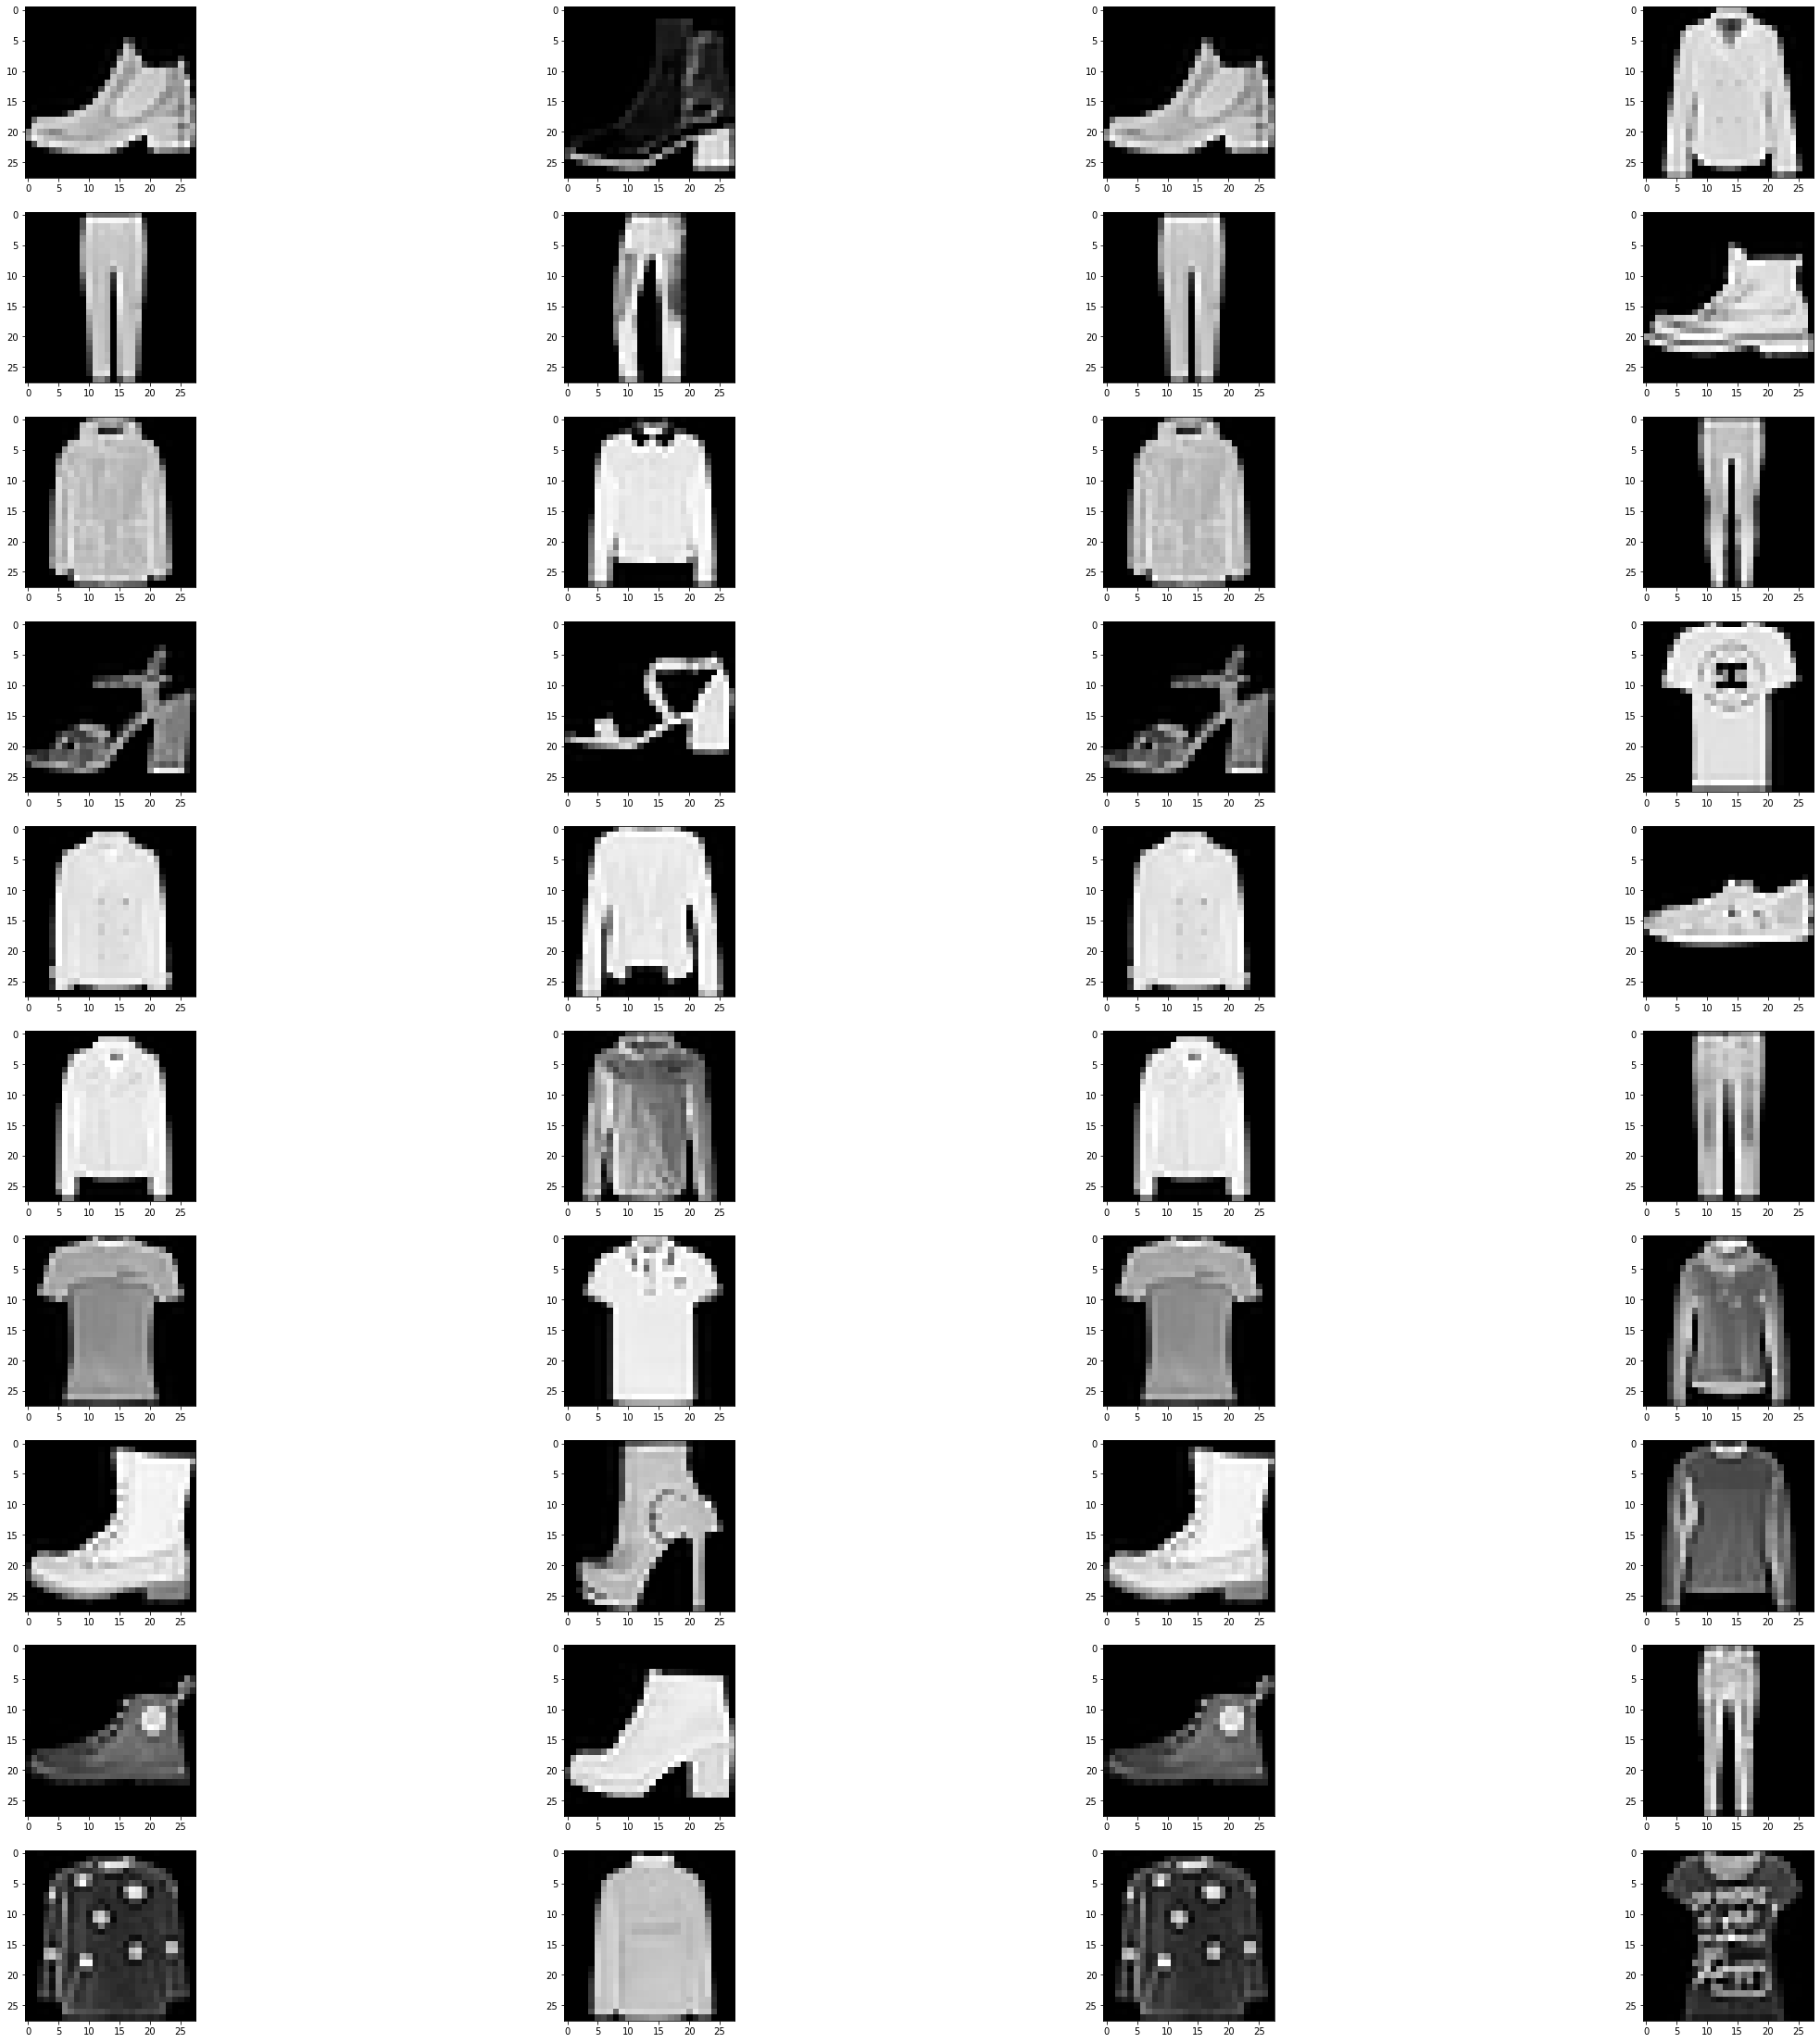

In [24]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(40, 40))
idx = 0
for row in range(10):
    idx = random.randrange(0,len(train_pairs),2)
    ax[row,0].imshow(train_pairs[idx][0],cmap = 'gray')
    ax[row,1].imshow(train_pairs[idx][1],cmap = 'gray')
    idx+=1
    ax[row,2].imshow(train_pairs[idx][0],cmap = 'gray')
    ax[row,3].imshow(train_pairs[idx][1],cmap = 'gray')
plt.show()

In [25]:
pickle_out = open("./Data/train_pairs.pickle","wb")
pickle.dump(train_pairs,pickle_out)
pickle_out.close()
pickle_out = open("./Data/train_y.pickle","wb")
pickle.dump(train_y,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_pairs1.pickle","wb")
pickle.dump(test_pairs1,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_y1.pickle","wb")
pickle.dump(test_y1,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_pairs2.pickle","wb")
pickle.dump(test_pairs2,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_y2.pickle","wb")
pickle.dump(test_y2,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_pairs3.pickle","wb")
pickle.dump(test_pairs3,pickle_out)
pickle_out.close()
pickle_out = open("./Data/test_y3.pickle","wb")
pickle.dump(test_y3,pickle_out)
pickle_out.close()